## Objetivo:

Usar técnicas de inteligência artificial para auxiliar na análise do mercado de carros elétricos.
## Instruções: 

* Dataset: ElectricCarData.csv
------------------------------------------------------

In [ ]:
### Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score

## Análise Exploratória

In [ ]:
### Carregados os dados do arquivo .csv e transformados em DataFrame utilizando a biblioteca pandas.
data = pd.read_csv("./ElectricCarData.csv")
data

In [ ]:
### Método retorna a dimensionalidade do DataFrame; 103 linhas e 14 colunas.
data.shape

In [ ]:
### Recriar a coluna FastCharge_KmH transformando os valores em númericos e substituindo os casos que não é 
### possível em NaN. Logo após, evocado o método .dropna para eliminar as linhas que não foi possível a 
### transformata.
data['FastCharge_KmH'] = pd.to_numeric(data['FastCharge_KmH'],errors = 'coerce')
data = data.dropna()
data

In [ ]:
### Executa a função convertRapidCharge ao longo de um eixo (por padrão é sob uma coluna) e converte os 
### dados "No" para 0 e "Yes" para 1.
def convertRapidCharge(foo):
    if foo == 'No':
        return 0
    else:
        return 1
    
data['RapidCharge'] = data['RapidCharge'].apply(convertRapidCharge)
data 

In [ ]:
### Retorna o número de vezes que o valor 1 é encontrado. Conclui-se então que, do DataFrame inicial (103 veículos),
### 98 veículos tem RapidCharge. Logo, os veículos que não foram possível transformar os valores dos atributos da 
### coluna FastCharge_KmH não tinham RapidCharge.
list(data['RapidCharge']).count(1)

In [ ]:
### Média de valor dos carros.
print(data["PriceEuro"].mean())

In [ ]:
### Indica o valor médio máximo e mínimo por marca.
data.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False)

In [ ]:
### Lista o veículo de maior valor.
data.loc[data['PriceEuro'] == data['PriceEuro'].max()]

In [ ]:
### Lista o veiculo de menor valor.
data.loc[data['PriceEuro'] == data['PriceEuro'].min()]

In [ ]:
## Plotagem de gráfico. O parâmetro hue pinta os gráficos dada uma coluna (powertrain) especificada.
sns.pairplot(data, hue="PowerTrain")

In [ ]:
### Média agrupada com base na tração
data.groupby('PowerTrain').mean()

In [ ]:
### Gráfico de caixa (boxplot) para cada uma das quatro variáveis numéricas especificadas.
fig, axes = pyplot.subplots(2, 2, figsize=(10, 10))

sns.boxplot(ax=axes[0][0],
            data=data,  
            x = data['AccelSec'], 
            hue = data['PowerTrain']
            )

sns.boxplot(ax=axes[0][1],
            data=data,  
            x = data['TopSpeed_KmH'], 
            hue = data['PowerTrain']
            )

sns.boxplot(ax=axes[1][0],
            data=data,  
            x = data['Efficiency_WhKm'],
            hue = data['PowerTrain']
            )

sns.boxplot(ax=axes[1][1],
            data=data,  
            x = data['FastCharge_KmH'],   
            hue = data['PowerTrain']
            )

Diante do exposto, os veículos que melhores performam são aqueles com tração AWD - apesar de serem os de maior média de valor, justica-se baseado nas média das outras métricas.

-------------------------
## Algoritmo de Machine Learning para classificar o tipo de tração do veículo baseado em seus outros parâmetros. 

In [ ]:
### Separando as colunas especificadas no DataFrame em x e atribui a coluna 'PowerTrain' a y.
x = data.drop(columns = ['Brand', 'Model','PowerTrain','PlugType','BodyStyle', 'Segment', 'RapidCharge'])
y = data['PowerTrain']

In [ ]:
### Divisão dos dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify=y)

In [ ]:
### Transformação de escala aos conjuntos de treinamento e teste usando a técnica de normalização Min-Max.
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
LR = LogisticRegression()
LR.fit(x_train_scaled, y_train)
y_predicted = LR.predict(x_test_scaled)
y_predicted

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicted,
                                   labels=['AWD','FWD','RWD'])

figure = pyplot.figure(figsize=(20, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['AWD','FWD','RWD'])
disp.plot() 

In [ ]:
print(classification_report(y_test, y_predicted))
print(f"Acurácia: {accuracy_score(y_test,y_predicted)*100}%")

-------------------------
## Escolha de um algoritmo de Clusterização e explicação de como ele funciona. 

## Algoritmo de clusterização: Gaussian Mixture Model

Um modelo de mistura gaussiana é uma distribuição montada a partir de distribuições gaussianas multivariadas ponderadas. Os fatores de ponderação atribuem a cada distribuição diferentes níveis de importância. O modelo resultante é uma superposição de curvas, como representado na figura: 

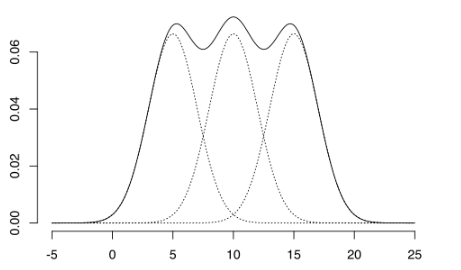

Os modelos de mistura gaussiana são semi-paramétricos; isso implica que o modelo vem de uma distribuição já conhecida (neste caso, um conjunto de distribuições normais). É semi-paramétrico porque mais componentes, possivelmente de distribuições desconhecidas, podem ser adicionados ao modelo.

## Qual a diferença entre Clusterização e Classificação?

## Clusterização x Classificação

A principal diferença entre algoritmos de Clusterização e Classificação é que, enquanto um é uma técnica de aprendizado não supervisionado (Classificação), o outro é uma técnica de aprendizado supervisionado (Clusterização). 

Ambos as técnicas funcionam com um fim comum: agrupar dados. 

Contudo, a maneira que ocorre esse agrupamento é distinta. Ao passo que algoritmos de Classificação já sabem previamente a classe onde esses dados devem ser atribuidos, nos algoritmos de Clusterização devem-se descobrir esses grupos com bases nos atributos do dataset. 

-------------------------
## Algoritmo de Machine Learning para predizer o preço do carro  baseado em seus parâmetros, com erro absoluto médio menor do que 10 mil euros.

In [ ]:
x = data.drop(columns = ['Brand', 'Model','PowerTrain','PlugType','BodyStyle', 'Segment', 'PriceEuro', 'RapidCharge'])
y = data['PriceEuro']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(x_train_scaled, y_train)
y_predicted = DTR.predict(x_test_scaled)
y_predicted

In [ ]:
R2model1 = r2_score(y_true = y_test, y_pred = y_predicted) 

print(f'R2: {R2model1}')  
print(f'MAE: {mean_absolute_error(y_true = y_test, y_pred = y_predicted)}')
print(f'MSE: {mean_squared_error(y_true = y_test, y_pred = y_predicted)}')

-------------------------
## Dado que existe uma relação aproximadamente exponecial entre o preço e um dos parâmetros de performance do veículo, transforme os dados para que o método preditor dos preços tenha uma MAE < 7 mil euros. Qual a diferença de R²?

In [ ]:
data['Log10'] = np.log10(data['PriceEuro'])
data.head()

In [ ]:
x = data.drop(columns = ['Brand', 'Model','PowerTrain','PlugType','BodyStyle', 'Segment', 'PriceEuro', 'RapidCharge', 'Log10'])
y = data['Log10']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(x_train_scaled, y_train)
y_pred = DTR.predict(x_test_scaled) 

R2model2 = r2_score(y_true = y_test, y_pred = y_pred)

print(f'R2: {R2model2}')  
print(f'MAE: {10 ** (mean_absolute_error(y_true = y_test, y_pred = y_pred))}')
print(f'MSE: {10 ** (mean_squared_error(y_true = y_test, y_pred = y_pred))}')

print(f'Diferença de R2 entre os modelos após linearização da coluna PriceEuro: {R2model2 - R2model1}. Assim sendo, um ganho de desempenho de aproximadamente {((R2model2 - R2model1)*100).astype(int)}%!')